In [ ]:
# Load the newly uploaded dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy import stats
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

In [ ]:
file_path_final = 'marketing_campaign (3).csv'
data = pd.read_csv(file_path_final)


In [ ]:
# Verify the dataset
data.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [ ]:

# Filter numeric columns
numeric_data = data.select_dtypes(include='number')

# Descriptive statistics for numeric columns
descriptive_stats = {
    'Mean': numeric_data.mean().to_dict(),
    'Median': numeric_data.median().to_dict(),
    'Min': numeric_data.min().to_dict(),
    'Max': numeric_data.max().to_dict(),
    'Standard Deviation': numeric_data.std().to_dict(),
    'Range': (numeric_data.max() - numeric_data.min()).to_dict()
}

# Print descriptive statistics
descriptive_stats


{'Mean': {'Facebook Ad Views': 2179.6876712328767,
  'Facebook Ad Clicks': 44.04931506849315,
  'Facebook Ad Conversions': 11.742465753424657,
  'AdWords Ad Views': 4717.1972602739725,
  'AdWords Ad Clicks': 60.38356164383562,
  'AdWords Ad Conversions': 5.980821917808219},
 'Median': {'Facebook Ad Views': 2202.0,
  'Facebook Ad Clicks': 43.0,
  'Facebook Ad Conversions': 12.0,
  'AdWords Ad Views': 4711.0,
  'AdWords Ad Clicks': 60.0,
  'AdWords Ad Conversions': 6.0},
 'Min': {'Facebook Ad Views': 1050,
  'Facebook Ad Clicks': 15,
  'Facebook Ad Conversions': 5,
  'AdWords Ad Views': 3714,
  'AdWords Ad Clicks': 31,
  'AdWords Ad Conversions': 3},
 'Max': {'Facebook Ad Views': 3320,
  'Facebook Ad Clicks': 73,
  'Facebook Ad Conversions': 19,
  'AdWords Ad Views': 5760,
  'AdWords Ad Clicks': 89,
  'AdWords Ad Conversions': 9},
 'Standard Deviation': {'Facebook Ad Views': 618.0746389600578,
  'Facebook Ad Clicks': 12.140558707834296,
  'Facebook Ad Conversions': 2.9247859792189983,
  

In [ ]:
pip install ace-tools

In [ ]:
import numpy as np
import scipy.stats as stats

# Add descriptive statistics to include additional measures

# Weighted Mean (assuming weights for some columns are provided, adjust as per dataset)
weighted_means = {col: np.average(numeric_data[col], weights=numeric_data[col], axis=0)
                  for col in numeric_data.columns if np.all(numeric_data[col] > 0)}

# Geometric Mean (only for positive numeric data)
geometric_means = {col: stats.gmean(numeric_data[col][numeric_data[col] > 0])
                   for col in numeric_data.columns if np.any(numeric_data[col] > 0)}

# Percentiles
percentiles = {col: {'25th': np.percentile(numeric_data[col], 25),
                     '50th (Median)': np.percentile(numeric_data[col], 50),
                     '75th': np.percentile(numeric_data[col], 75)}
               for col in numeric_data.columns}

# Quartiles (similar to percentiles)
quartiles = percentiles  # Quartiles are just another name for 25th, 50th, and 75th percentiles

# Interquartile Range (IQR)
iqr = {col: np.percentile(numeric_data[col], 75) - np.percentile(numeric_data[col], 25)
       for col in numeric_data.columns}

# Variance and Coefficient of Variation
variance = numeric_data.var().to_dict()
coefficient_of_variation = {col: numeric_data[col].std() / numeric_data[col].mean()
                            for col in numeric_data.columns}

# Five-number summary (Min, Q1, Median, Q3, Max)
five_number_summary = {col: {
    'Min': numeric_data[col].min(),
    'Q1': np.percentile(numeric_data[col], 25),
    'Median': np.percentile(numeric_data[col], 50),
    'Q3': np.percentile(numeric_data[col], 75),
    'Max': numeric_data[col].max()
} for col in numeric_data.columns}

# Covariance and Correlation Coefficient
covariance = numeric_data.cov()
correlation_coefficient = numeric_data.corr()

# Compile the extended descriptive statistics
extended_descriptive_stats = {
    'Mean': numeric_data.mean().to_dict(),
    'Weighted Mean': weighted_means,
    'Geometric Mean': geometric_means,
    'Percentiles': percentiles,
    'Quartiles': quartiles,
    'Range': (numeric_data.max() - numeric_data.min()).to_dict(),
    'Interquartile Range': iqr,
    'Variance': variance,
    'Standard Deviation': numeric_data.std().to_dict(),
    'Coefficient of Variation': coefficient_of_variation,
    'Five-Number Summary': five_number_summary,
    'Covariance': covariance,
    'Correlation Coefficient': correlation_coefficient
}

import numpy as np
import scipy.stats as stats
import pandas as pd


# Display results using pandas directly
print("Extended Descriptive Statistics:")
print(numeric_data.describe()) # Displaying the dataframe using pandas' describe()

extended_descriptive_stats


Extended Descriptive Statistics:
       Facebook Ad Views  Facebook Ad Clicks  Facebook Ad Conversions  \
count         365.000000          365.000000               365.000000   
mean         2179.687671           44.049315                11.742466   
std           618.074639           12.140559                 2.924786   
min          1050.000000           15.000000                 5.000000   
25%          1656.000000           35.000000                10.000000   
50%          2202.000000           43.000000                12.000000   
75%          2717.000000           54.000000                13.000000   
max          3320.000000           73.000000                19.000000   

       AdWords Ad Views  AdWords Ad Clicks  AdWords Ad Conversions  
count         365.00000         365.000000              365.000000  
mean         4717.19726          60.383562                5.980822  
std           561.11406          14.368225                1.628106  
min          3714.00000          

{'Mean': {'Facebook Ad Views': 2179.6876712328767,
  'Facebook Ad Clicks': 44.04931506849315,
  'Facebook Ad Conversions': 11.742465753424657,
  'AdWords Ad Views': 4717.1972602739725,
  'AdWords Ad Clicks': 60.38356164383562,
  'AdWords Ad Conversions': 5.980821917808219},
 'Weighted Mean': {'Facebook Ad Views': 2354.469427566599,
  'Facebook Ad Clicks': 47.386242069909194,
  'Facebook Ad Conversions': 12.468968735417638,
  'AdWords Ad Views': 4783.759324813841,
  'AdWords Ad Clicks': 63.793103448275865,
  'AdWords Ad Conversions': 6.422812643151627},
 'Geometric Mean': {'Facebook Ad Views': 2086.429894091521,
  'Facebook Ad Clicks': 42.3010515942334,
  'Facebook Ad Conversions': 11.368022510718468,
  'AdWords Ad Views': 4683.563071882897,
  'AdWords Ad Clicks': 58.60498075856529,
  'AdWords Ad Conversions': 5.746818030066641},
 'Percentiles': {'Facebook Ad Views': {'25th': 1656.0,
   '50th (Median)': 2202.0,
   '75th': 2717.0},
  'Facebook Ad Clicks': {'25th': 35.0, '50th (Median)': 

In [ ]:
data.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


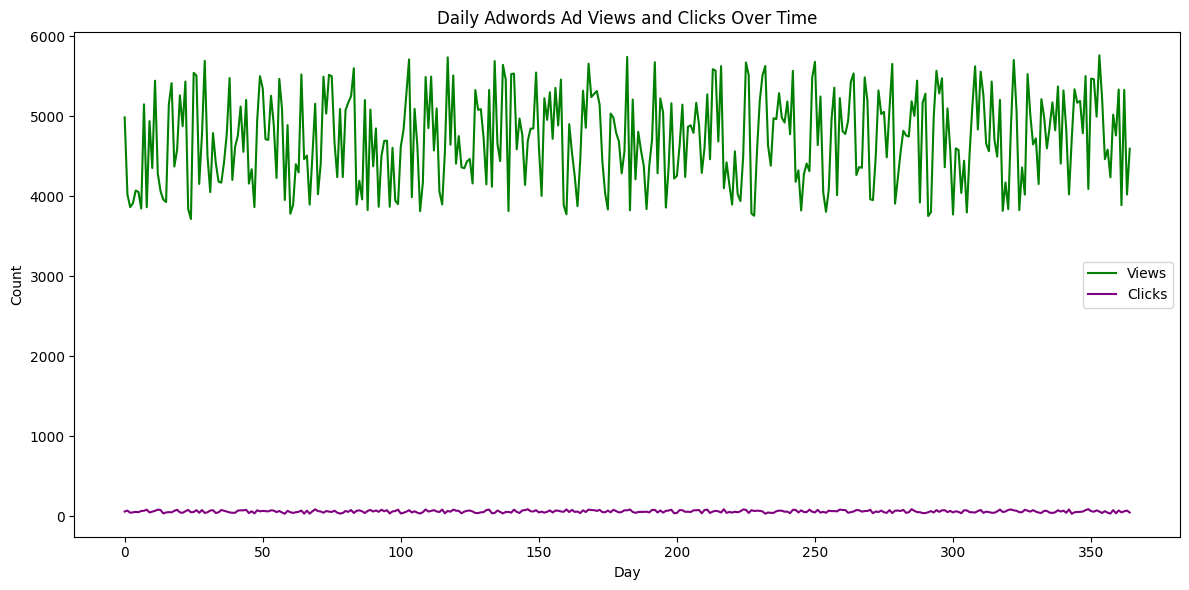

In [ ]:
# 1. Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['AdWords Ad Views'], label='Views', color='green')
sns.lineplot(x=data.index, y=data['AdWords Ad Clicks'], label='Clicks', color='purple')
plt.title("Daily Adwords Ad Views and Clicks Over Time")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

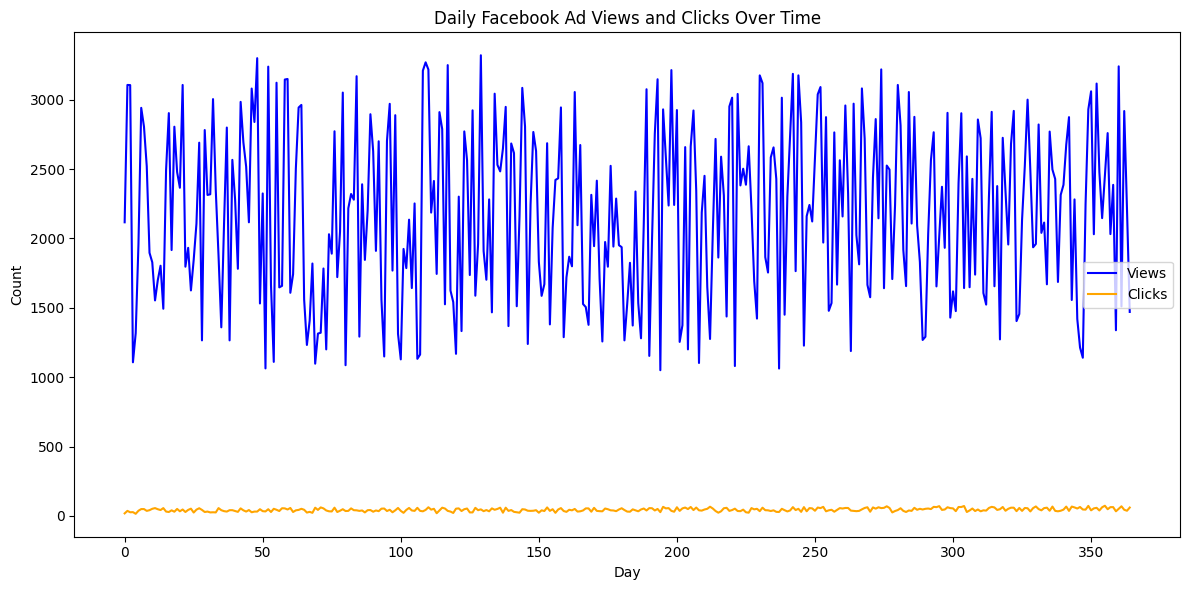

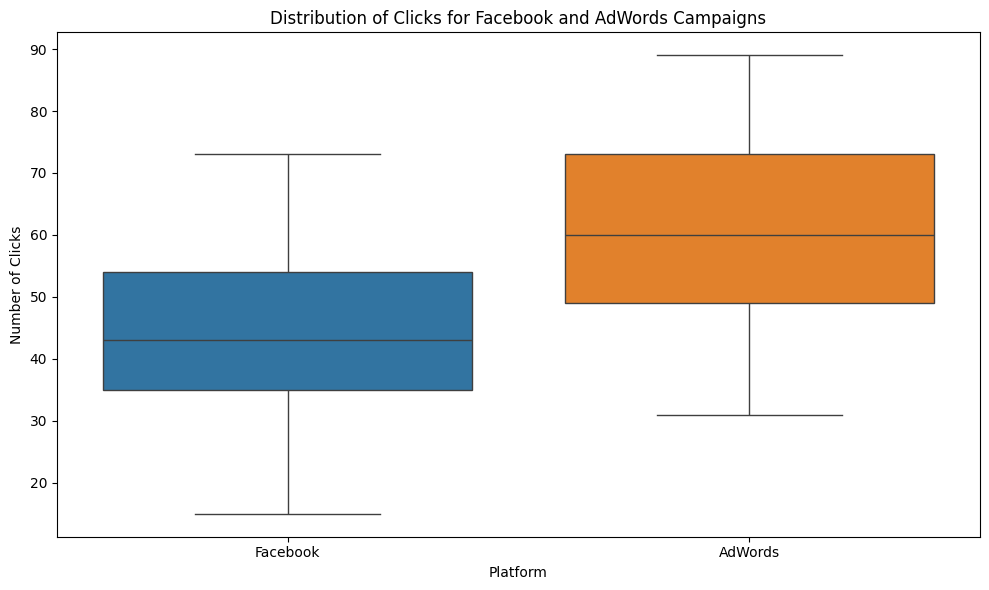

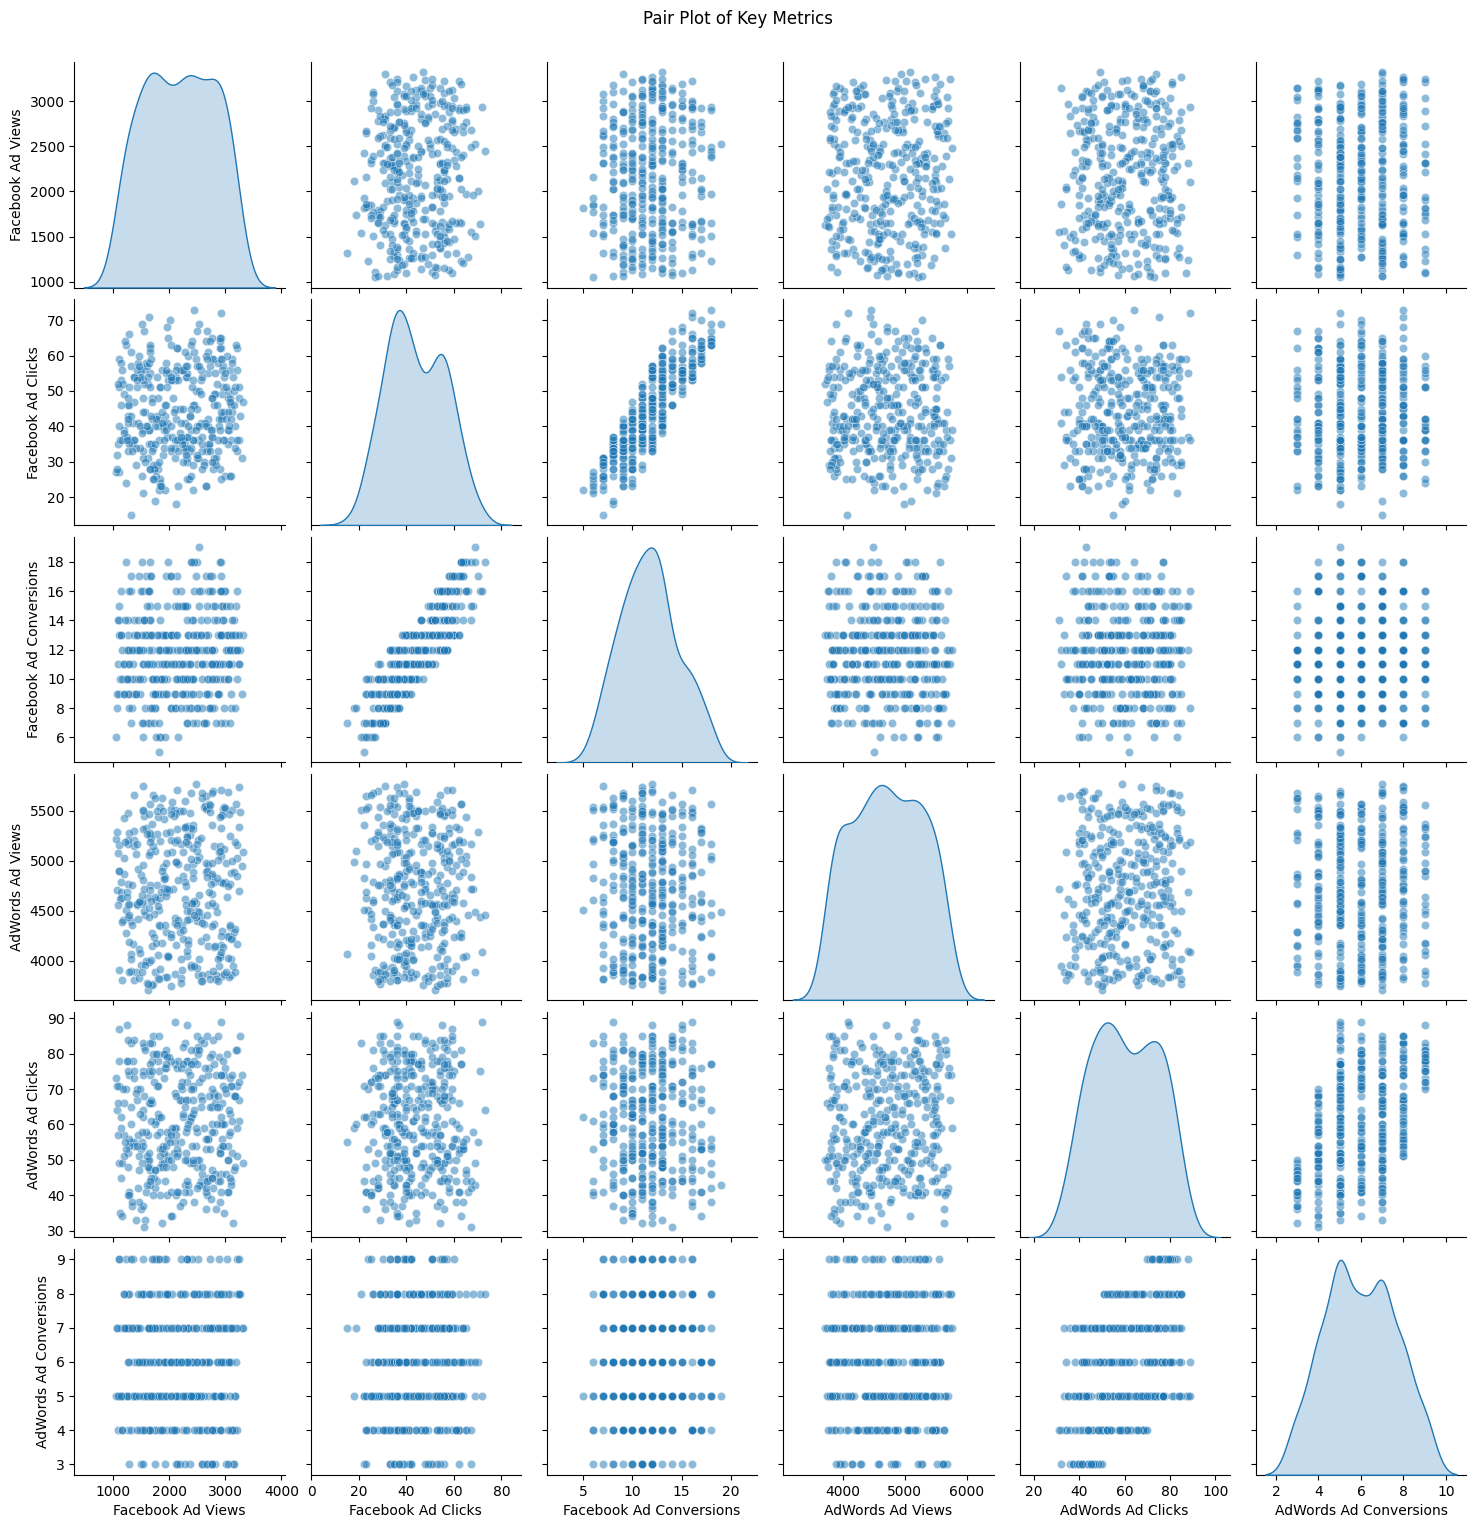

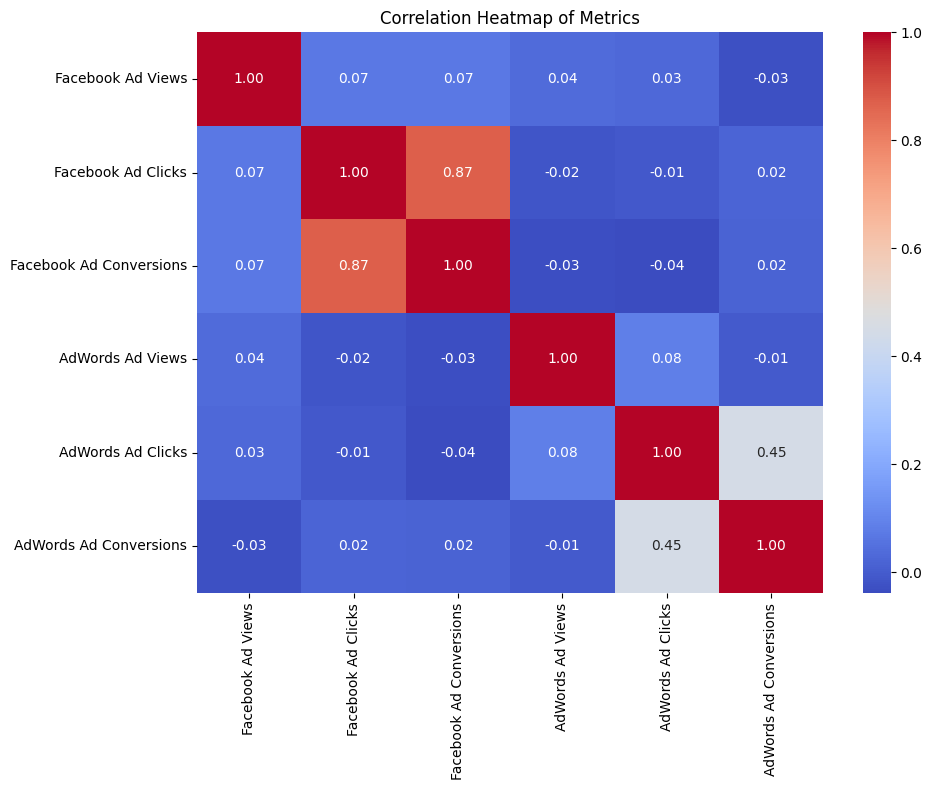

<ipython-input-9-1213cd18eb91>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platforms, y=values, palette="pastel")


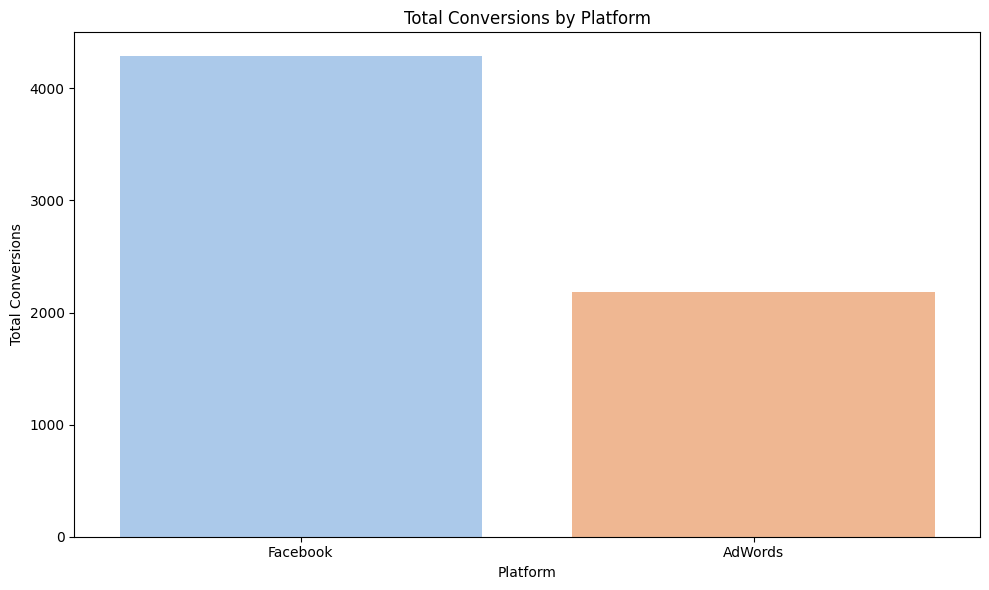

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['Facebook Ad Views'], label='Views', color='blue')
sns.lineplot(x=data.index, y=data['Facebook Ad Clicks'], label='Clicks', color='orange')
plt.title("Daily Facebook Ad Views and Clicks Over Time")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Facebook Ad Clicks', 'AdWords Ad Clicks']])
plt.title("Distribution of Clicks for Facebook and AdWords Campaigns")
plt.xlabel("Platform")
plt.ylabel("Number of Clicks")
plt.xticks([0, 1], ['Facebook', 'AdWords'])
plt.tight_layout()
plt.show()

# 3. Pair Plot
key_metrics = data[['Facebook Ad Views', 'Facebook Ad Clicks', 'Facebook Ad Conversions',
                    'AdWords Ad Views', 'AdWords Ad Clicks', 'AdWords Ad Conversions']]
sns.pairplot(key_metrics, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Key Metrics", y=1.02)
plt.show()

# 4. Heatmap
correlation_matrix = key_metrics.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Metrics")
plt.tight_layout()
plt.show()

# 5. Bar Chart
conversion_totals = {
    'Facebook': data['Facebook Ad Conversions'].sum(),
    'AdWords': data['AdWords Ad Conversions'].sum()
}
platforms = list(conversion_totals.keys())
values = list(conversion_totals.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=platforms, y=values, palette="pastel")
plt.title("Total Conversions by Platform")
plt.xlabel("Platform")
plt.ylabel("Total Conversions")
plt.tight_layout()
plt.show()


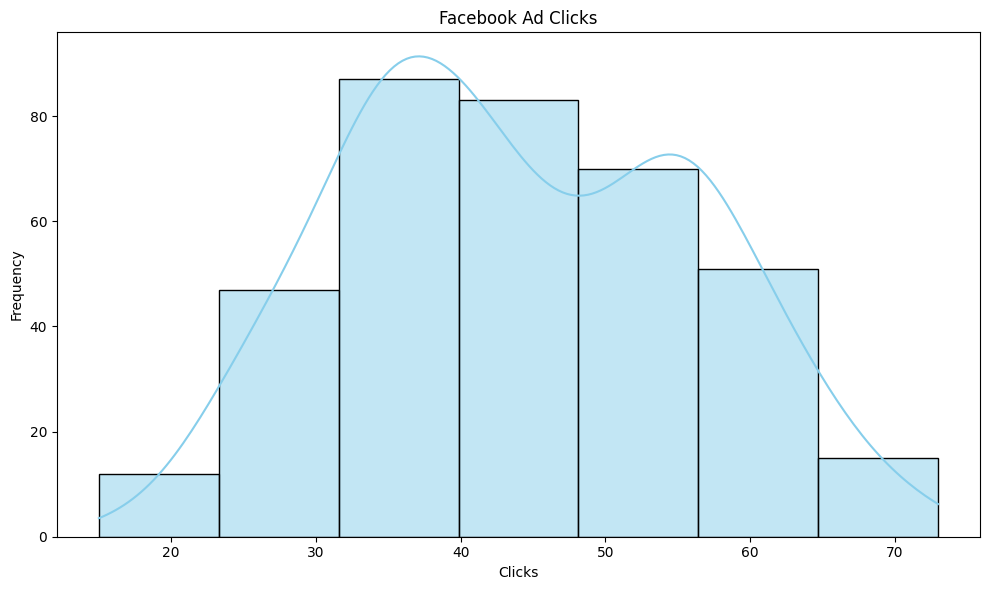

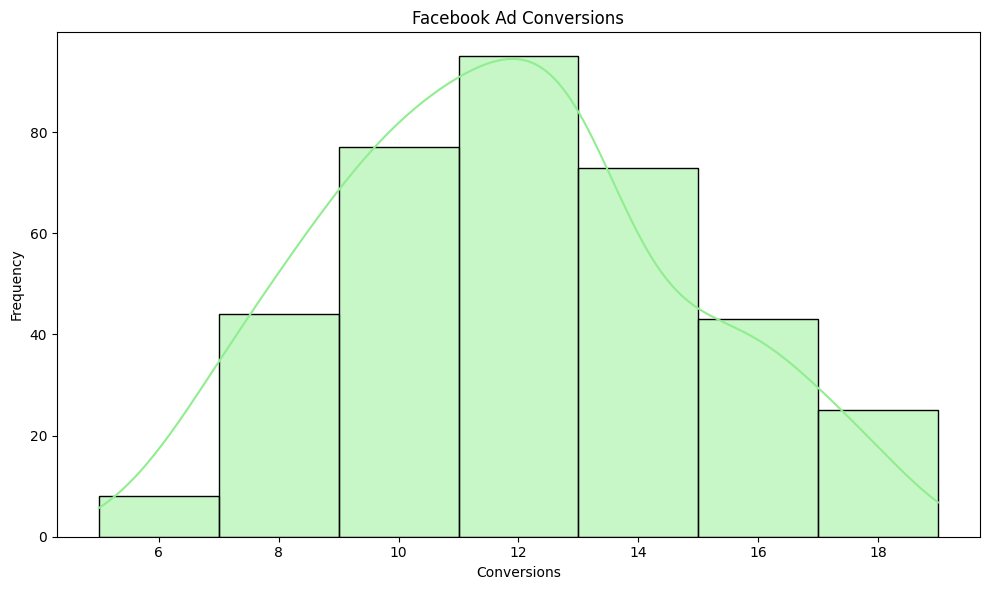

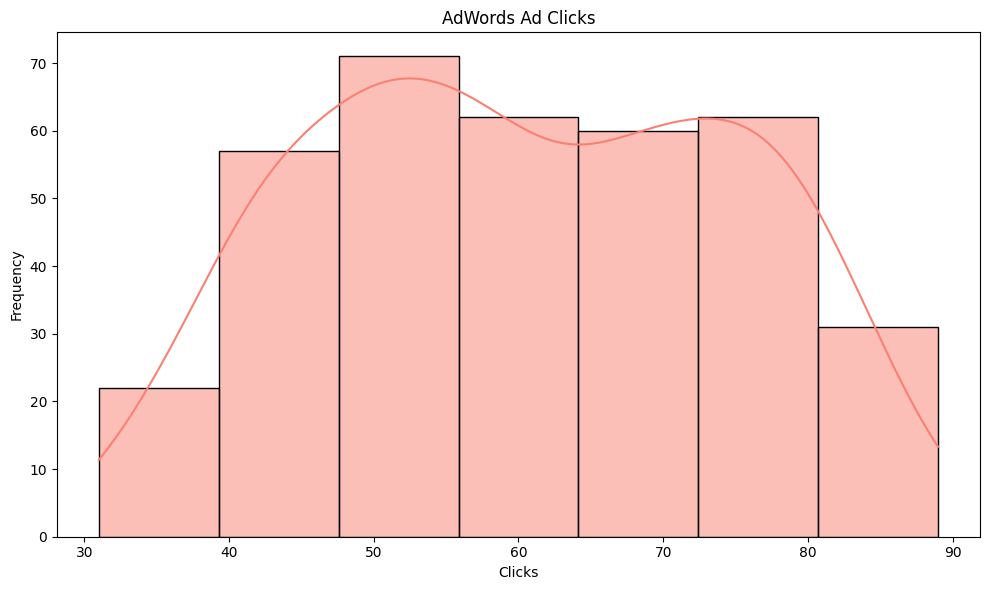

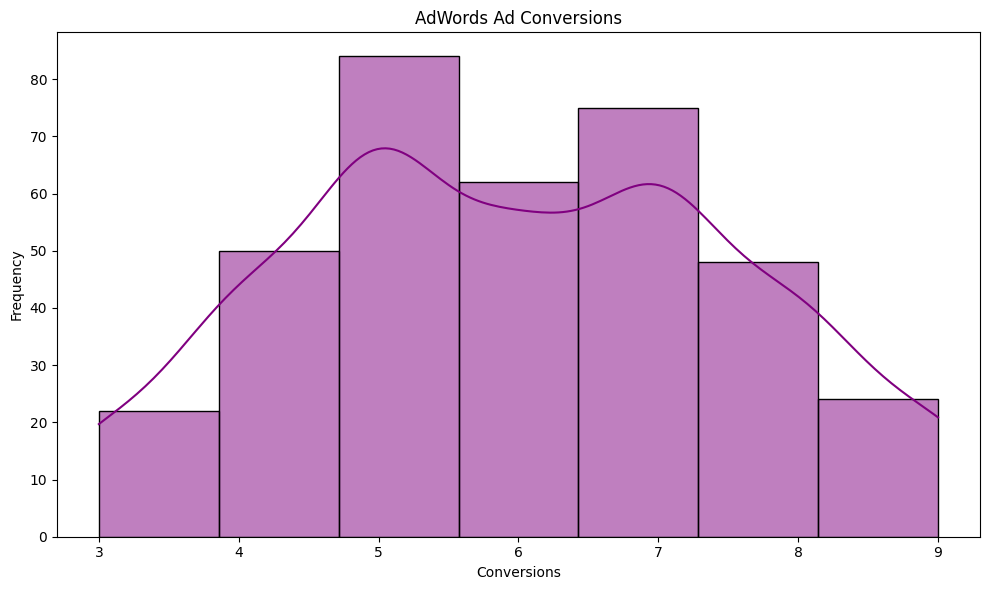

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Individual histograms for Facebook and AdWords

# Facebook Ad Clicks
plt.figure(figsize=(10, 6))
sns.histplot(data['Facebook Ad Clicks'], bins=7, edgecolor='k', kde=True, color='skyblue')
plt.title('Facebook Ad Clicks')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Facebook Ad Conversions
plt.figure(figsize=(10, 6))
sns.histplot(data['Facebook Ad Conversions'], bins=7, edgecolor='k', kde=True, color='lightgreen')
plt.title('Facebook Ad Conversions')
plt.xlabel('Conversions')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# AdWords Ad Clicks
plt.figure(figsize=(10, 6))
sns.histplot(data['AdWords Ad Clicks'], bins=7, edgecolor='k', kde=True, color='salmon')
plt.title('AdWords Ad Clicks')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# AdWords Ad Conversions
plt.figure(figsize=(10, 6))
sns.histplot(data['AdWords Ad Conversions'], bins=7, edgecolor='k', kde=True, color='purple')
plt.title('AdWords Ad Conversions')
plt.xlabel('Conversions')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


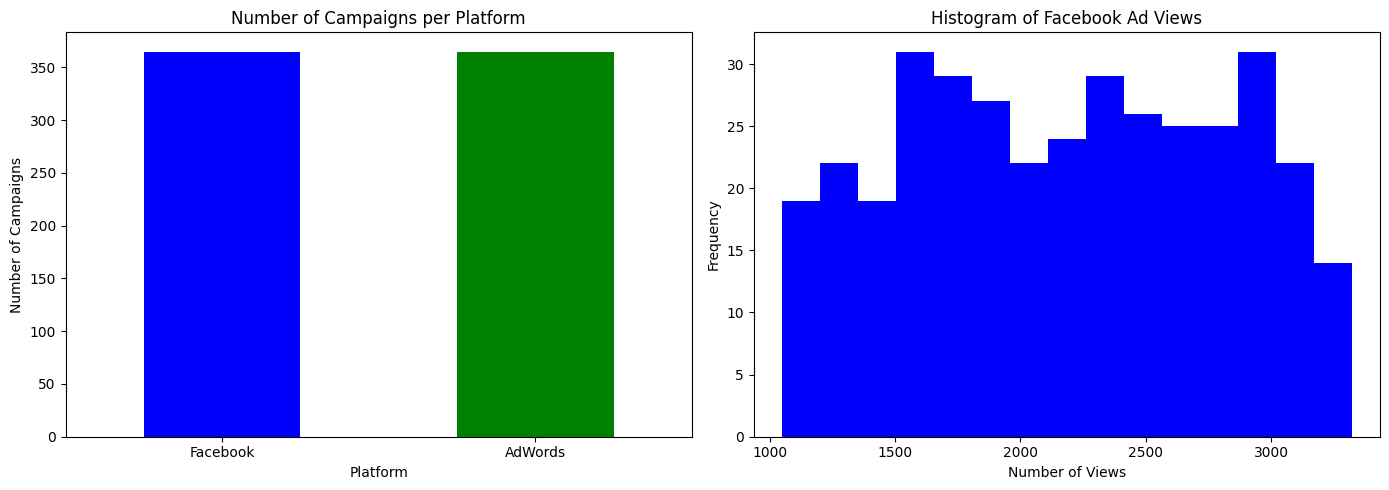

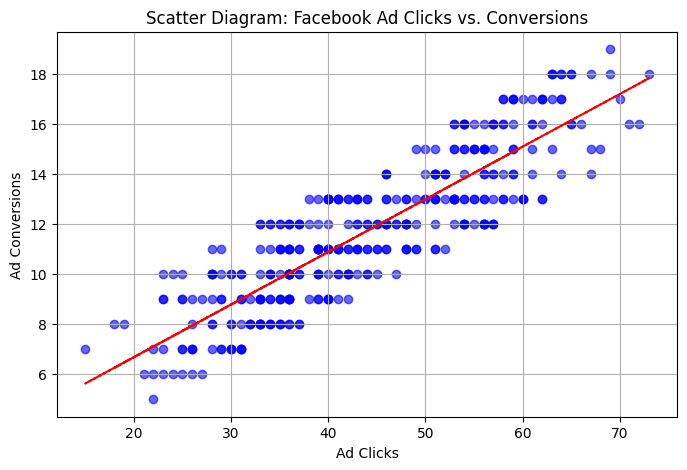

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation for categorical summary: Counting occurrences for each platform
campaign_counts = pd.Series({
    "Facebook": data['Facebook Ad Views'].count(),
    "AdWords": data['AdWords Ad Views'].count()
})

# Creating a bar chart for the number of campaigns per platform
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for campaigns
campaign_counts.plot(kind='bar', color=['blue', 'green'], ax=ax[0])
ax[0].set_title('Number of Campaigns per Platform')
ax[0].set_xlabel('Platform')
ax[0].set_ylabel('Number of Campaigns')
ax[0].set_xticklabels(['Facebook', 'AdWords'], rotation=0)

# Histogram for Facebook Ad Views
data['Facebook Ad Views'].plot(kind='hist', bins=15, color='blue', ax=ax[1])
ax[1].set_title('Histogram of Facebook Ad Views')
ax[1].set_xlabel('Number of Views')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Data for scatter plot
x = data['Facebook Ad Clicks']
y = data['Facebook Ad Conversions']

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.6, color='blue')
plt.title('Scatter Diagram: Facebook Ad Clicks vs. Conversions')
plt.xlabel('Ad Clicks')
plt.ylabel('Ad Conversions')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.grid(True)
plt.show()


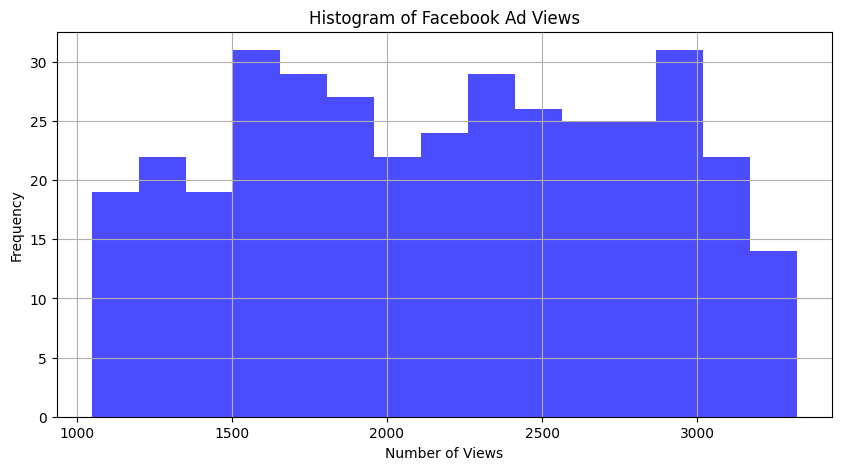

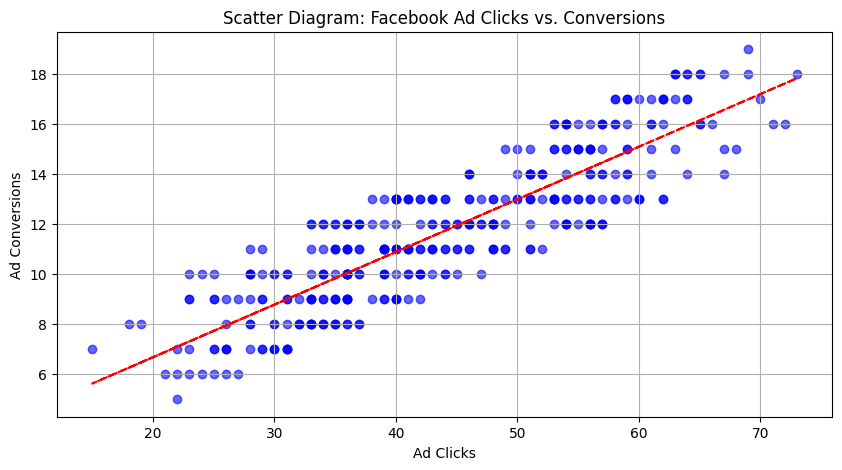

In [ ]:
# Preparing visualizations for Facebook metrics
# Histogram for Facebook Ad Views
plt.figure(figsize=(10, 5))
plt.hist(data['Facebook Ad Views'], bins=15, color='blue', alpha=0.7)
plt.title('Histogram of Facebook Ad Views')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter plot for Facebook Clicks vs. Conversions
plt.figure(figsize=(10, 5))
plt.scatter(data['Facebook Ad Clicks'], data['Facebook Ad Conversions'], color='blue', alpha=0.6)
plt.title('Scatter Diagram: Facebook Ad Clicks vs. Conversions')
plt.xlabel('Ad Clicks')
plt.ylabel('Ad Conversions')
z_fb = np.polyfit(data['Facebook Ad Clicks'], data['Facebook Ad Conversions'], 1)
p_fb = np.poly1d(z_fb)
plt.plot(data['Facebook Ad Clicks'], p_fb(data['Facebook Ad Clicks']), "r--")
plt.grid(True)
plt.show()


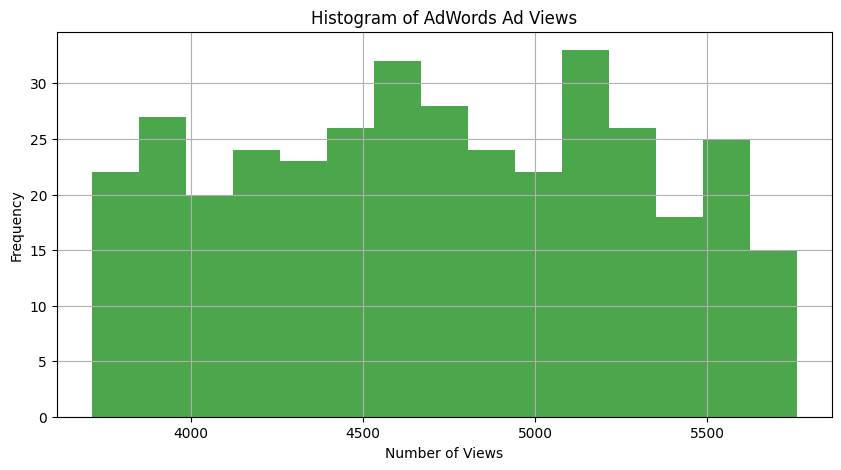

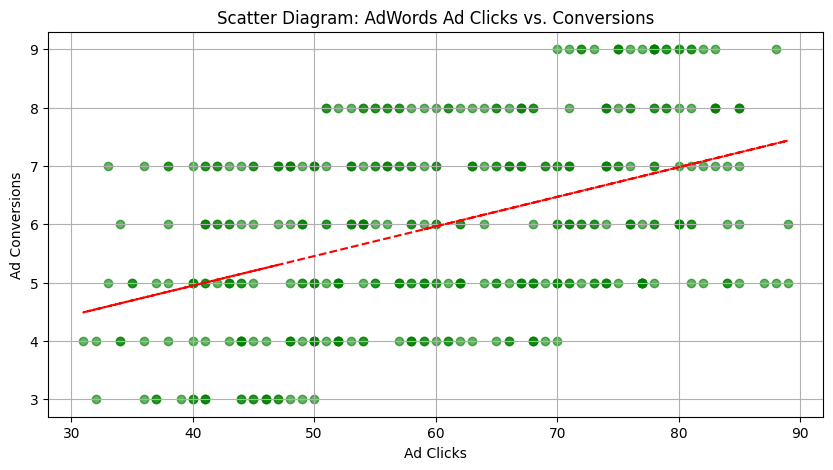

In [ ]:


# Preparing visualizations for AdWords metrics
# Histogram for AdWords Ad Views
plt.figure(figsize=(10, 5))
plt.hist(data['AdWords Ad Views'], bins=15, color='green', alpha=0.7)
plt.title('Histogram of AdWords Ad Views')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter plot for AdWords Clicks vs. Conversions
plt.figure(figsize=(10, 5))
plt.scatter(data['AdWords Ad Clicks'], data['AdWords Ad Conversions'], color='green', alpha=0.6)
plt.title('Scatter Diagram: AdWords Ad Clicks vs. Conversions')
plt.xlabel('Ad Clicks')
plt.ylabel('Ad Conversions')
z = np.polyfit(data['AdWords Ad Clicks'], data['AdWords Ad Conversions'], 1)
p = np.poly1d(z)
plt.plot(data['AdWords Ad Clicks'], p(data['AdWords Ad Clicks']), "r--")
plt.grid(True)
plt.show()


In [ ]:
data.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


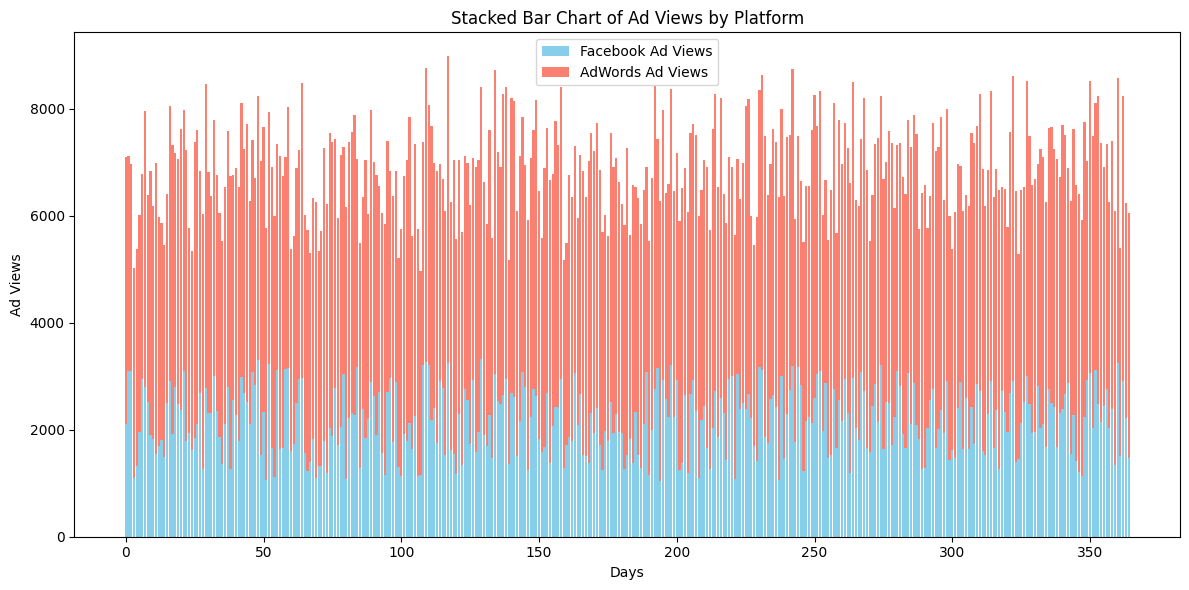

In [ ]:
# Aggregating daily Facebook and AdWords Ad Views for a stacked bar chart
days = range(len(data))
facebook_views = data['Facebook Ad Views']
adwords_views = data['AdWords Ad Views']

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(days, facebook_views, label='Facebook Ad Views', color='skyblue')
plt.bar(days, adwords_views, bottom=facebook_views, label='AdWords Ad Views', color='salmon')
plt.title("Stacked Bar Chart of Ad Views by Platform")
plt.xlabel("Days")
plt.ylabel("Ad Views")
plt.legend()
plt.tight_layout()
plt.show()


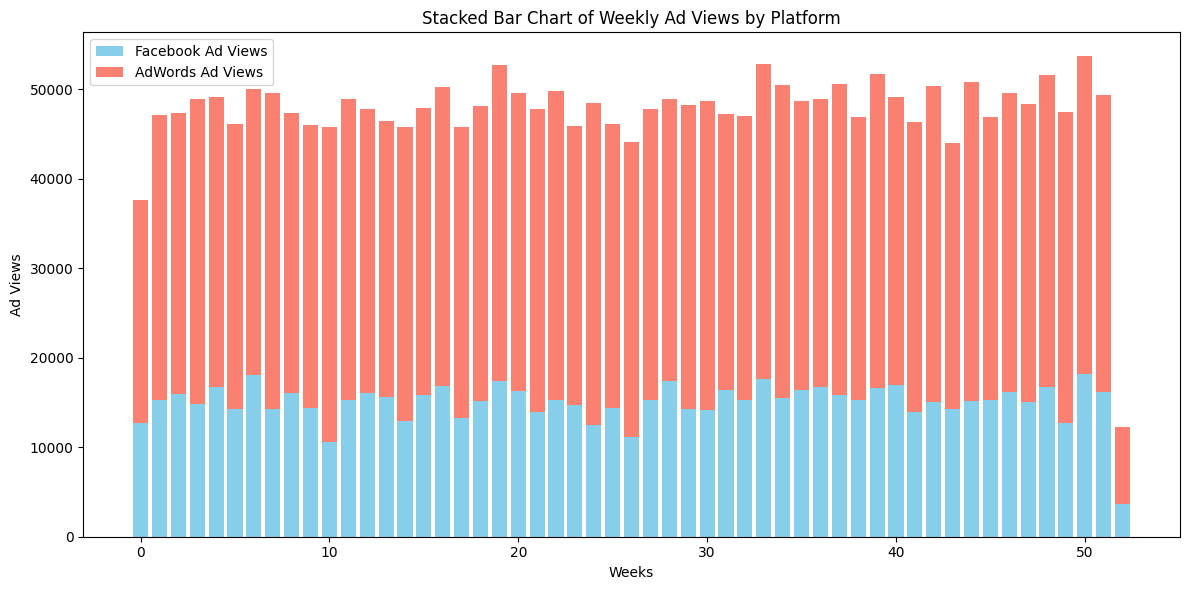

In [ ]:
# Ensure 'Date' column exists and convert to datetime
data['Date'] = pd.to_datetime(data['Date'])  # Replace 'Date' with your date column if named differently
data.set_index('Date', inplace=True)

# Resample data to weekly sums
weekly_data = data.resample('W').sum()

# Get weekly Facebook and AdWords Ad Views
weeks = range(len(weekly_data))
facebook_weekly_views = weekly_data['Facebook Ad Views']
adwords_weekly_views = weekly_data['AdWords Ad Views']

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(weeks, facebook_weekly_views, label='Facebook Ad Views', color='skyblue')
plt.bar(weeks, adwords_weekly_views, bottom=facebook_weekly_views, label='AdWords Ad Views', color='salmon')
plt.title("Stacked Bar Chart of Weekly Ad Views by Platform")
plt.xlabel("Weeks")
plt.ylabel("Ad Views")
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-17-94b90a69e6f0>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').sum()


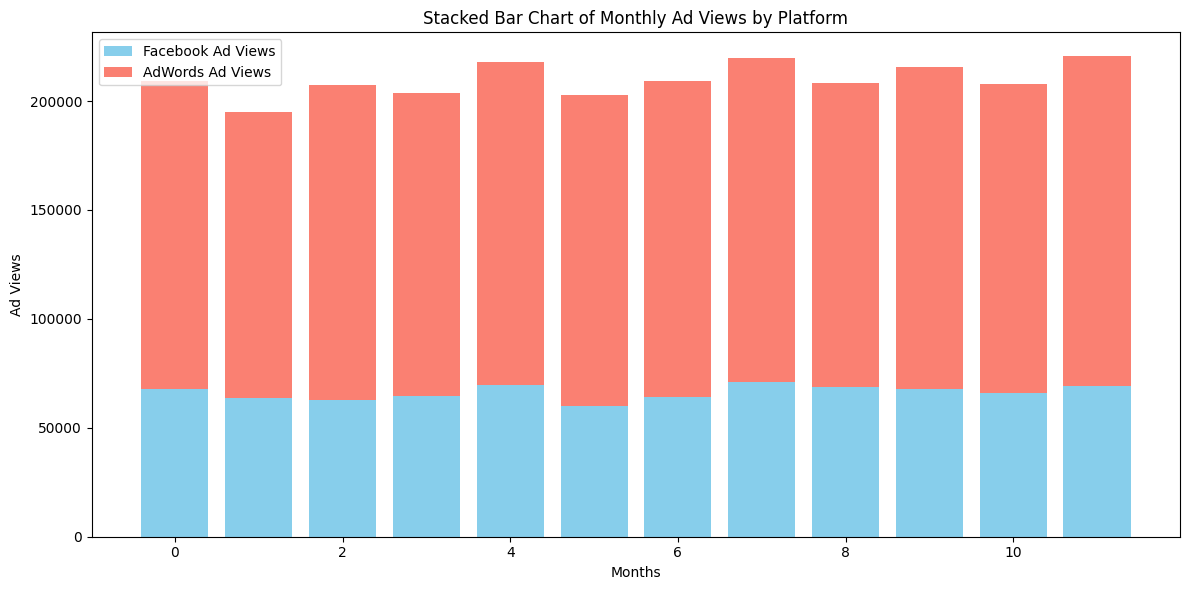

In [ ]:
# Aggregate the data monthly and create a stacked bar chart for monthly Facebook and AdWords Ad Views

# Resample data to monthly sums
monthly_data = data.resample('M').sum()

# Get monthly Facebook and AdWords Ad Views
months = range(len(monthly_data))
facebook_monthly_views = monthly_data['Facebook Ad Views']
adwords_monthly_views = monthly_data['AdWords Ad Views']

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(months, facebook_monthly_views, label='Facebook Ad Views', color='skyblue')
plt.bar(months, adwords_monthly_views, bottom=facebook_monthly_views, label='AdWords Ad Views', color='salmon')
plt.title("Stacked Bar Chart of Monthly Ad Views by Platform")
plt.xlabel("Months")
plt.ylabel("Ad Views")
plt.legend()
plt.tight_layout()
plt.show()


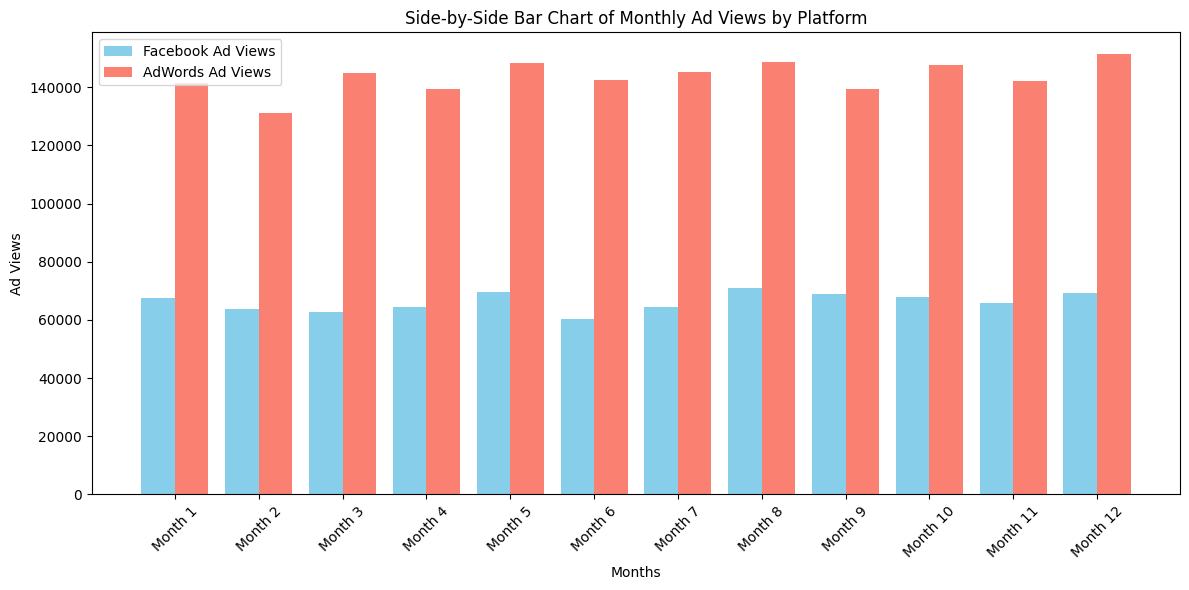

In [ ]:
# Create a side-by-side bar chart for monthly Facebook and AdWords Ad Views

# Indices for the bars
months = range(len(monthly_data))

# Bar width
bar_width = 0.4

# Create the side-by-side bar chart
plt.figure(figsize=(12, 6))
plt.bar([m - bar_width / 2 for m in months], facebook_monthly_views, width=bar_width, label='Facebook Ad Views', color='skyblue')
plt.bar([m + bar_width / 2 for m in months], adwords_monthly_views, width=bar_width, label='AdWords Ad Views', color='salmon')

# Chart details
plt.title("Side-by-Side Bar Chart of Monthly Ad Views by Platform")
plt.xlabel("Months")
plt.ylabel("Ad Views")
plt.xticks(months, labels=[f"Month {i+1}" for i in months], rotation=45)  # Replace with actual month names if available
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
data.head()

,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
Date,,,,,,,,,,,,,,,,
2019-01-01,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
2019-01-02,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2019-01-03,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
2019-01-04,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
2019-01-05,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


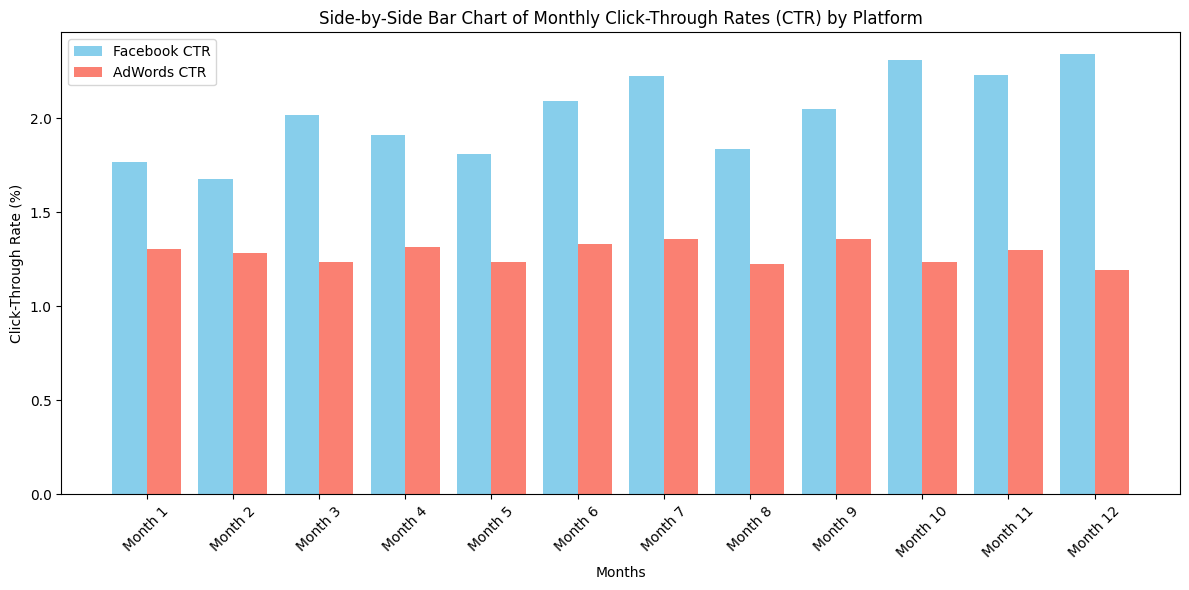

In [ ]:
# Create a side-by-side bar chart for monthly Facebook and AdWords Click-Through Rates (CTR)

# Aggregate the data monthly for Click-Through Rates (assuming CTR columns are available)
monthly_data['Facebook CTR'] = monthly_data['Facebook Ad Clicks'] / monthly_data['Facebook Ad Views'] * 100
monthly_data['AdWords CTR'] = monthly_data['AdWords Ad Clicks'] / monthly_data['AdWords Ad Views'] * 100

# Extract monthly Click-Through Rates
facebook_monthly_ctr = monthly_data['Facebook CTR']
adwords_monthly_ctr = monthly_data['AdWords CTR']

# Bar width for side-by-side placement
bar_width = 0.4

# Create the side-by-side bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    [m - bar_width / 2 for m in months], facebook_monthly_ctr,
    width=bar_width, label='Facebook CTR', color='skyblue'
)
plt.bar(
    [m + bar_width / 2 for m in months], adwords_monthly_ctr,
    width=bar_width, label='AdWords CTR', color='salmon'
)

# Chart details
plt.title("Side-by-Side Bar Chart of Monthly Click-Through Rates (CTR) by Platform")
plt.xlabel("Months")
plt.ylabel("Click-Through Rate (%)")
plt.xticks(months, labels=[f"Month {i+1}" for i in months], rotation=45)  # Replace with actual month names if needed
plt.legend()
plt.tight_layout()
plt.show()


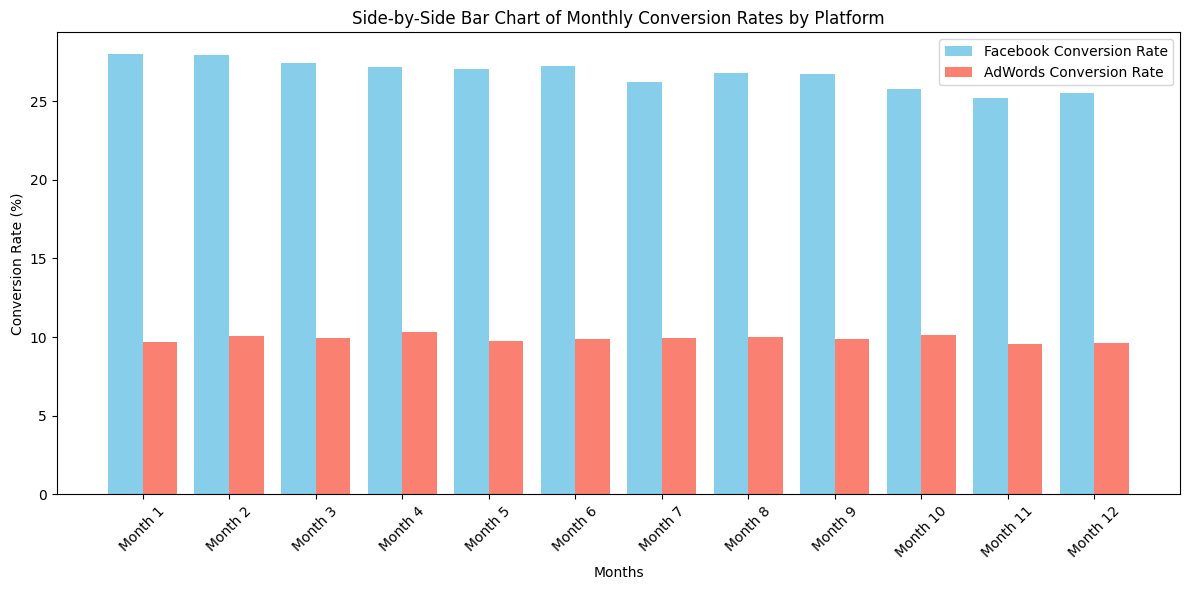

In [ ]:
# Create a side-by-side bar chart for monthly Facebook and AdWords Conversion Rates

# Calculate monthly Conversion Rates
monthly_data['Facebook Conversion Rate'] = monthly_data['Facebook Ad Conversions'] / monthly_data['Facebook Ad Clicks'] * 100
monthly_data['AdWords Conversion Rate'] = monthly_data['AdWords Ad Conversions'] / monthly_data['AdWords Ad Clicks'] * 100

# Extract monthly Conversion Rates
facebook_monthly_conversion_rate = monthly_data['Facebook Conversion Rate']
adwords_monthly_conversion_rate = monthly_data['AdWords Conversion Rate']

# Bar width for side-by-side placement
bar_width = 0.4

# Create the side-by-side bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    [m - bar_width / 2 for m in months], facebook_monthly_conversion_rate,
    width=bar_width, label='Facebook Conversion Rate', color='skyblue'
)
plt.bar(
    [m + bar_width / 2 for m in months], adwords_monthly_conversion_rate,
    width=bar_width, label='AdWords Conversion Rate', color='salmon'
)

# Chart details
plt.title("Side-by-Side Bar Chart of Monthly Conversion Rates by Platform")
plt.xlabel("Months")
plt.ylabel("Conversion Rate (%)")
plt.xticks(months, labels=[f"Month {i+1}" for i in months], rotation=45)  # Replace with actual month names if needed
plt.legend()
plt.tight_layout()
plt.show()


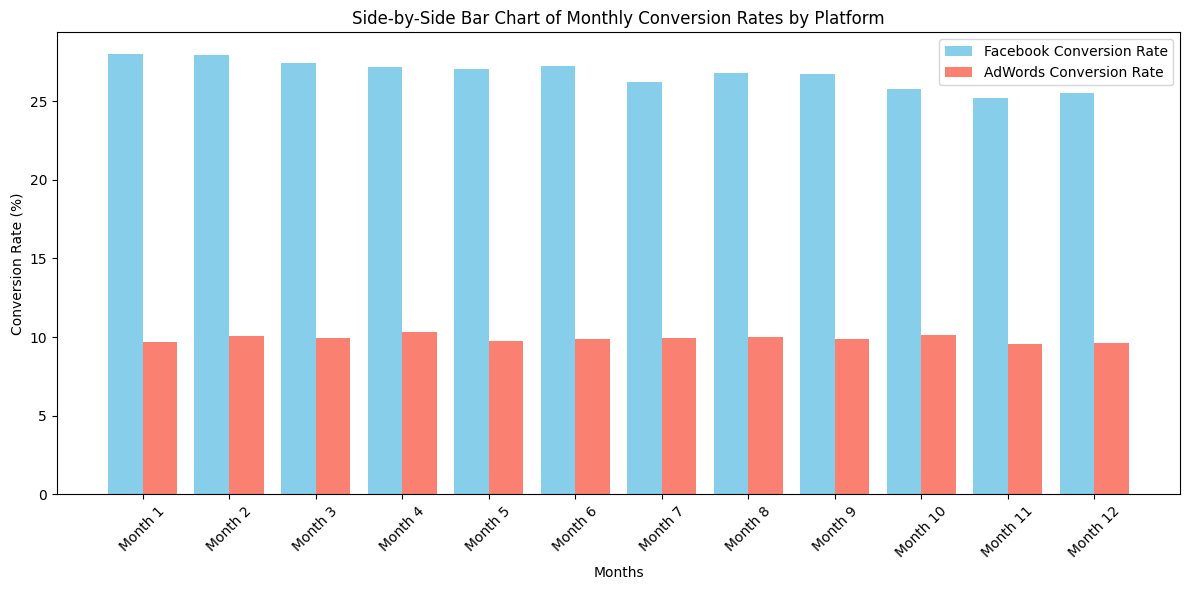

In [ ]:
# Create a side-by-side bar chart for monthly Facebook and AdWords Conversion Rates

# Calculate monthly Conversion Rates
monthly_data['Facebook Conversion Rate'] = monthly_data['Facebook Ad Conversions'] / monthly_data['Facebook Ad Clicks'] * 100
monthly_data['AdWords Conversion Rate'] = monthly_data['AdWords Ad Conversions'] / monthly_data['AdWords Ad Clicks'] * 100

# Extract monthly Conversion Rates
facebook_monthly_conversion_rate = monthly_data['Facebook Conversion Rate']
adwords_monthly_conversion_rate = monthly_data['AdWords Conversion Rate']

# Bar width for side-by-side placement
bar_width = 0.4

# Create the side-by-side bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    [m - bar_width / 2 for m in months], facebook_monthly_conversion_rate,
    width=bar_width, label='Facebook Conversion Rate', color='skyblue'
)
plt.bar(
    [m + bar_width / 2 for m in months], adwords_monthly_conversion_rate,
    width=bar_width, label='AdWords Conversion Rate', color='salmon'
)

# Chart details
plt.title("Side-by-Side Bar Chart of Monthly Conversion Rates by Platform")
plt.xlabel("Months")
plt.ylabel("Conversion Rate (%)")
plt.xticks(months, labels=[f"Month {i+1}" for i in months], rotation=45)  # Replace with actual month names if needed
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:

# Cleaning the monetary values to make them numeric for calculations
data['Cost per Facebook Ad'] = data['Cost per Facebook Ad'].replace('[\$,]', '', regex=True).astype(float)
data['Facebook Cost per Click (Ad Cost / Clicks)'] = data['Facebook Cost per Click (Ad Cost / Clicks)'].replace('[\$,]', '', regex=True).astype(float)
data['Cost per AdWords Ad'] = data['Cost per AdWords Ad'].replace('[\$,]', '', regex=True).astype(float)
data['AdWords Cost per Click (Ad Cost / Clicks)'] = data['AdWords Cost per Click (Ad Cost / Clicks)'].replace('[\$,]', '', regex=True).astype(float)

# Average cost per ad, cost per click, and cost per conversion for Facebook and AdWords
average_costs = data[['Cost per Facebook Ad', 'Facebook Cost per Click (Ad Cost / Clicks)', 'Facebook Ad Conversions',
                      'Cost per AdWords Ad', 'AdWords Cost per Click (Ad Cost / Clicks)', 'AdWords Ad Conversions']].mean()

# Calculating the average cost per conversion for both platforms
average_costs['Facebook Cost per Conversion'] = average_costs['Cost per Facebook Ad'] / data['Facebook Ad Conversions'].replace(0, 1).mean()
average_costs['AdWords Cost per Conversion'] = average_costs['Cost per AdWords Ad'] / data['AdWords Ad Conversions'].replace(0, 1).mean()

average_costs


,0
Cost per Facebook Ad,87.780822
Facebook Cost per Click (Ad Cost / Clicks),2.187808
Facebook Ad Conversions,11.742466
Cost per AdWords Ad,134.975342
AdWords Cost per Click (Ad Cost / Clicks),2.377863
AdWords Ad Conversions,5.980822
Facebook Cost per Conversion,7.475502
AdWords Cost per Conversion,22.568026


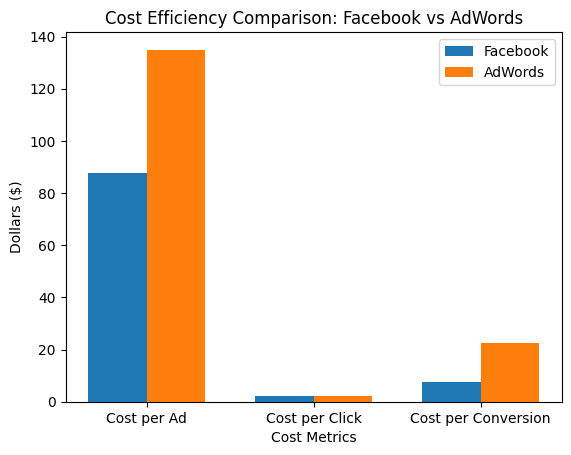

In [ ]:
import matplotlib.pyplot as plt

# Data preparation for plotting
categories = ['Cost per Ad', 'Cost per Click', 'Cost per Conversion']
facebook_costs = [average_costs['Cost per Facebook Ad'], average_costs['Facebook Cost per Click (Ad Cost / Clicks)'], average_costs['Facebook Cost per Conversion']]
adwords_costs = [average_costs['Cost per AdWords Ad'], average_costs['AdWords Cost per Click (Ad Cost / Clicks)'], average_costs['AdWords Cost per Conversion']]

# Creating the bar chart
fig, ax = plt.subplots()
index = range(len(categories))
bar_width = 0.35

rects1 = ax.bar(index, facebook_costs, bar_width, label='Facebook')
rects2 = ax.bar([p + bar_width for p in index], adwords_costs, bar_width, label='AdWords')

ax.set_xlabel('Cost Metrics')
ax.set_ylabel('Dollars ($)')
ax.set_title('Cost Efficiency Comparison: Facebook vs AdWords')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(categories)
ax.legend()

plt.show()


In [ ]:
# Clean cost columns (remove "$" and convert to numeric)
data['Cost per Facebook Ad'] = data['Cost per Facebook Ad'].replace('[\$,]', '', regex=True).astype(float)
data['Cost per AdWords Ad'] = data['Cost per AdWords Ad'].replace('[\$,]', '', regex=True).astype(float)

# Calculate metrics for Facebook Ads
data['Facebook CTR (%)'] = (data['Facebook Ad Clicks'] / data['Facebook Ad Views']) * 100
data['Facebook Conversion Rate (%)'] = (data['Facebook Ad Conversions'] / data['Facebook Ad Clicks']) * 100
data['Facebook CPC ($)'] = data['Cost per Facebook Ad'] / data['Facebook Ad Clicks']
data['Facebook Cost per Conversion ($)'] = data['Cost per Facebook Ad'] / data['Facebook Ad Conversions']

# Calculate metrics for AdWords Ads
data['AdWords CTR (%)'] = (data['AdWords Ad Clicks'] / data['AdWords Ad Views']) * 100
data['AdWords Conversion Rate (%)'] = (data['AdWords Ad Conversions'] / data['AdWords Ad Clicks']) * 100
data['AdWords CPC ($)'] = data['Cost per AdWords Ad'] / data['AdWords Ad Clicks']
data['AdWords Cost per Conversion ($)'] = data['Cost per AdWords Ad'] / data['AdWords Ad Conversions']

# Aggregate metrics
summary = data[['Facebook CTR (%)', 'Facebook Conversion Rate (%)', 'Facebook CPC ($)',
                'Facebook Cost per Conversion ($)', 'AdWords CTR (%)',
                'AdWords Conversion Rate (%)', 'AdWords CPC ($)',
                'AdWords Cost per Conversion ($)']].mean()

print("Summary of Metrics:")
print(summary)

# Export the enhanced dataset to a new CSV

Summary of Metrics:
Facebook CTR (%)                     2.203776
Facebook Conversion Rate (%)        27.180295
Facebook CPC ($)                     2.186332
Facebook Cost per Conversion ($)     8.069773
AdWords CTR (%)                      1.295591
AdWords Conversion Rate (%)         10.206838
AdWords CPC ($)                      2.379524
AdWords Cost per Conversion ($)     24.712652
dtype: float64


In [ ]:
# Assigning probabilities for Facebook Ad Views
data['Facebook View Probability'] = data['Facebook Ad Views'] / data['Facebook Ad Views'].sum()
data['AdWords View Probability'] = data['AdWords Ad Views'] / data['AdWords Ad Views'].sum()

In [ ]:
# Probability of a click on Facebook and AdWords
facebook_click_prob = data['Facebook Ad Clicks'].sum() / data['Facebook Ad Views'].sum()
adwords_click_prob = data['AdWords Ad Clicks'].sum() / data['AdWords Ad Views'].sum()
print("Facebook Click Probability:", facebook_click_prob)
print("AdWords Click Probability:", adwords_click_prob)


Facebook Click Probability: 0.020209003175018163
AdWords Click Probability: 0.012800728549632153


In [ ]:
# Conditional Probability: Given a click, probability of conversion
facebook_conversion_prob = data['Facebook Ad Conversions'].sum() / data['Facebook Ad Clicks'].sum()
facebook_no_conversion_prob = 1 - facebook_conversion_prob
adwords_conversion_prob = data['AdWords Ad Conversions'].sum() / data['AdWords Ad Clicks'].sum()
adwords_no_conversion_prob = 1 - adwords_conversion_prob

print("Facebook Conversion Probability:", facebook_conversion_prob)
print("Facebook No Conversion Probability:", facebook_no_conversion_prob)
print("AdWords Conversion Probability:", adwords_conversion_prob)
print("AdWords No Conversion Probability:", adwords_no_conversion_prob)

Facebook Conversion Probability: 0.26657544470705313
Facebook No Conversion Probability: 0.7334245552929468
AdWords Conversion Probability: 0.09904718693284936
AdWords No Conversion Probability: 0.9009528130671507


In [ ]:
# Conditional Probability: Given a click, probability of conversion
# data['Facebook Conditional Conversion Prob'] = data['Facebook Ad Conversions'] / data['Facebook Ad Clicks']
# data['AdWords Conditional Conversion Prob'] = data['AdWords Ad Conversions'] / data['AdWords Ad Clicks']

In [ ]:
# Bayes' Theorem for Facebook Conversion
total_conversions = data['Facebook Ad Conversions'].sum() + data['AdWords Ad Conversions'].sum()
facebook_given_conversion = (facebook_conversion_prob * data['Facebook Ad Clicks'].sum()) / total_conversions
print("P(Facebook | Conversion):", facebook_given_conversion)

adwords_given_conversion = (adwords_conversion_prob * data['AdWords Ad Clicks'].sum()) / total_conversions
print("P(AdWords | Conversion):", adwords_given_conversion)

P(Facebook | Conversion): 0.6625444427268511
P(AdWords | Conversion): 0.33745555727314885


In [ ]:
# Probability distribution of Facebook Clicks
facebook_click_distribution = data['Facebook Ad Clicks'].value_counts(normalize=True)
print(facebook_click_distribution)

adword_click_distribution = data['AdWords Ad Clicks'].value_counts(normalize=True)
print(adword_click_distribution)

Facebook Ad Clicks
36    0.060274
40    0.043836
56    0.038356
54    0.035616
39    0.035616
33    0.035616
35    0.032877
51    0.032877
46    0.030137
34    0.030137
48    0.027397
42    0.027397
41    0.027397
53    0.027397
57    0.027397
31    0.024658
28    0.024658
59    0.024658
37    0.024658
43    0.024658
44    0.021918
55    0.019178
58    0.019178
30    0.019178
26    0.016438
25    0.016438
62    0.016438
29    0.016438
49    0.013699
45    0.013699
61    0.013699
23    0.013699
52    0.013699
64    0.013699
63    0.013699
65    0.010959
50    0.010959
32    0.010959
60    0.010959
47    0.010959
38    0.008219
67    0.008219
22    0.008219
24    0.005479
27    0.005479
69    0.005479
68    0.002740
72    0.002740
71    0.002740
70    0.002740
18    0.002740
66    0.002740
21    0.002740
19    0.002740
15    0.002740
73    0.002740
Name: proportion, dtype: float64
AdWords Ad Clicks
78    0.032877
50    0.030137
41    0.030137
54    0.030137
74    0.030137
71    0.027397


In [ ]:
# Expected value and variance for Facebook Ad Clicks
expected_value = data['Facebook Ad Clicks'].mean()
variance = data['Facebook Ad Clicks'].var()
print("Expected Value Facebook:", expected_value, "Variance:", variance)

expected_value = data['AdWords Ad Clicks'].mean()
variance = data['AdWords Ad Clicks'].var()
print("Expected Value Adwords:", expected_value, "Variance:", variance)

Expected Value Facebook: 44.04931506849315 Variance: 147.39316573837115
Expected Value Adwords: 60.38356164383562 Variance: 206.44588288423898


In [ ]:
# Define random variables
# data['Random Variable - Facebook'] = data['Facebook Ad Clicks']
# data['Random Variable - AdWords'] = data['AdWords Ad Clicks']

In [ ]:
# # Covariance
# covariance = data[['Facebook Ad Clicks', 'Facebook Ad Conversions']].cov().iloc[0, 1]
# print("Covariance between Clicks and Conversions:", covariance)

# covariance = data[['AdWords Ad Clicks', 'AdWords Ad Conversions']].cov().iloc[0, 1]
# print("Covariance between Clicks and Conversions:", covariance)

In [ ]:
# from scipy.stats import poisson

# # Poisson distribution for average 2 clicks per interval
# lambda_ = facebook_click_prob * 100
# poisson_prob = poisson.pmf(5, lambda_)
# print("Poisson Probability for 5 clicks:", poisson_prob)

# lambda_ = adwords_click_prob * 100
# poisson_prob = poisson.pmf(5, lambda_)
# print("Poisson Probability for 5 clicks:", poisson_prob)

In [ ]:
data.to_csv('enhanced_ad_campaign_data.csv', index=False)

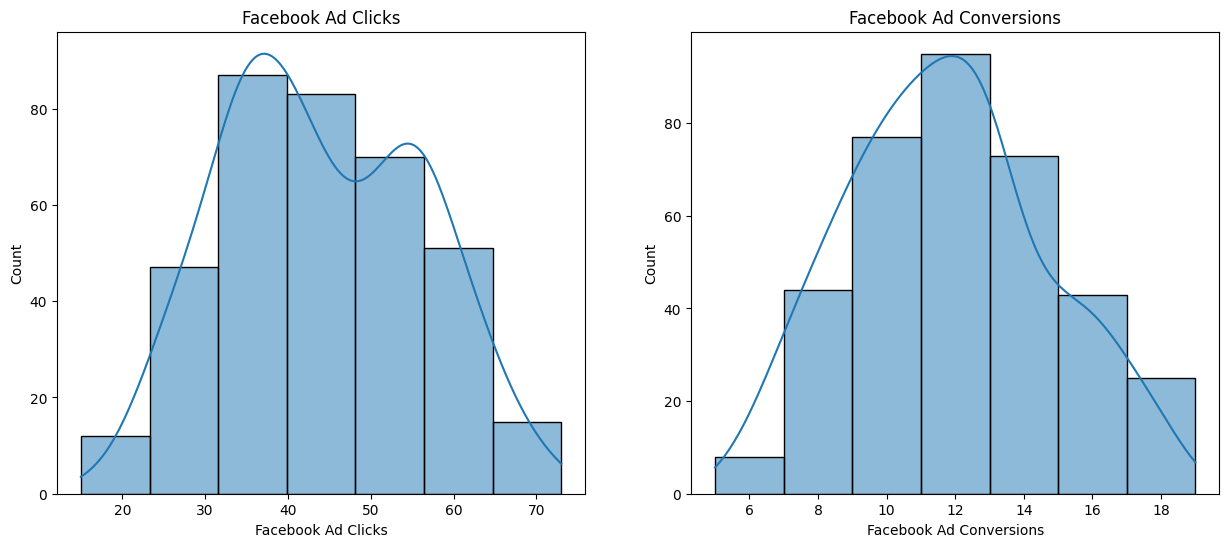

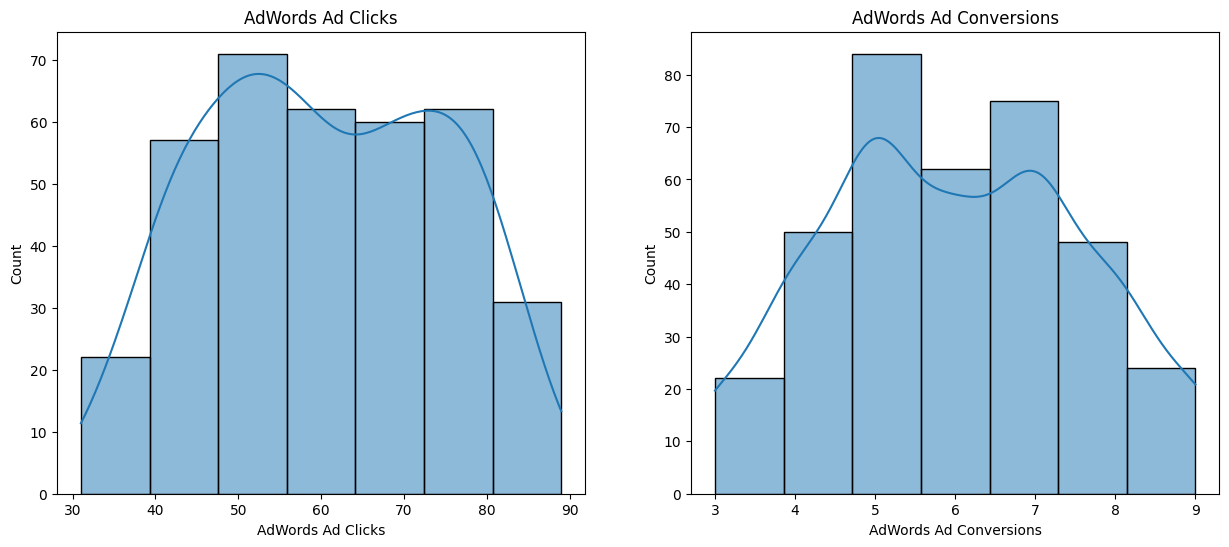

In [ ]:
#Histogram plot for Facebook and Adword
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(data['Facebook Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(data['Facebook Ad Conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(data['AdWords Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('AdWords Ad Conversions')
sns.histplot(data['AdWords Ad Conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()

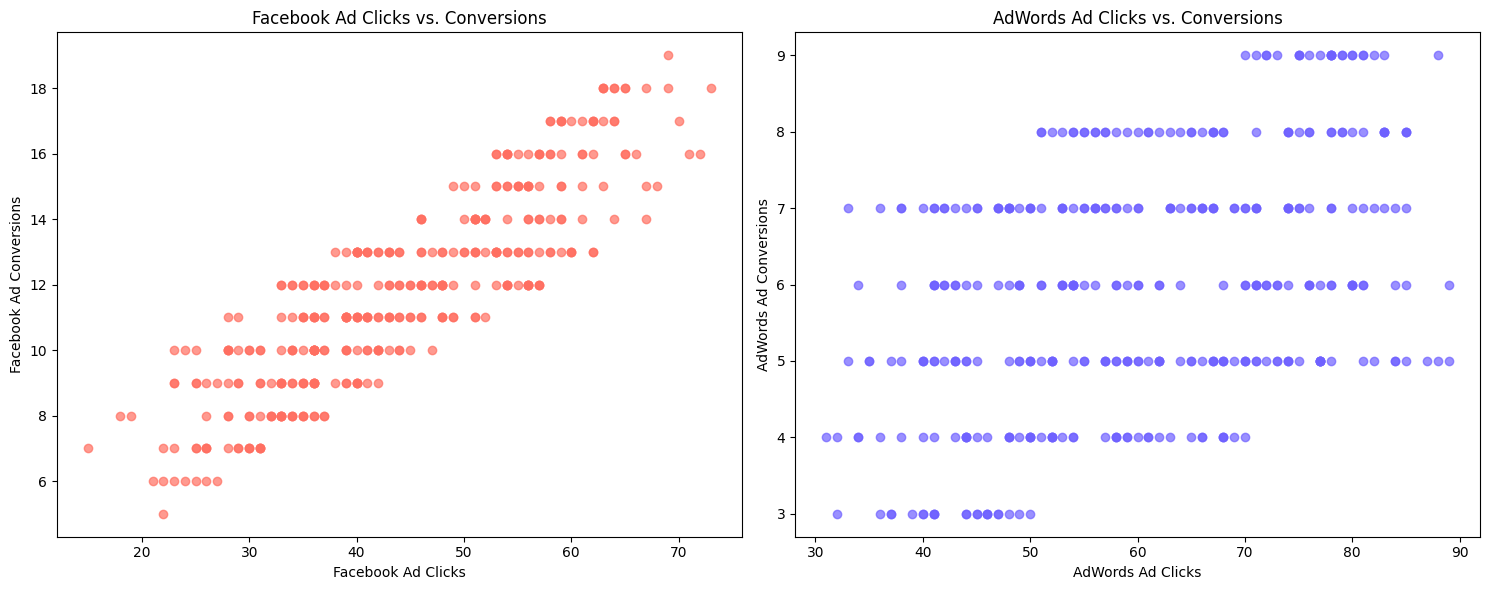

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# Scatter plot for Facebook
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(data['Facebook Ad Clicks'], data['Facebook Ad Conversions'], color='#FF6F61', alpha=0.7)
plt.title('Facebook Ad Clicks vs. Conversions')
plt.xlabel('Facebook Ad Clicks')
plt.ylabel('Facebook Ad Conversions')


# Scatter plot for AdWords
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(data['AdWords Ad Clicks'], data['AdWords Ad Conversions'], color='#6F61FF', alpha=0.7)
plt.title('AdWords Ad Clicks vs. Conversions')
plt.xlabel('AdWords Ad Clicks')
plt.ylabel('AdWords Ad Conversions')


plt.tight_layout()
plt.show()


In [ ]:
facebook_corr = data[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [ ]:
adwords_corr = data[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [ ]:
print('Correlation Coeff \n--------------')
print('Facebook :',round(facebook_corr.values[0,1],2))
print('AdWords : ',round(adwords_corr.values[0,1],2))

Correlation Coeff 
--------------
Facebook : 0.87
AdWords :  0.45


**Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

**Null Hypothesis (H0):** There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

H0: µ_Facebook ≤ µ_AdWords

**Alternate Hypothesis (H1):** The number of conversions from Facebook is greater than the number of conversions from AdWords.

H1: µ_Facebook > µ_AdWords

In [ ]:
import scipy.stats as st
print('Mean Conversion \n--------------')
print('Facebook :', round(data['Facebook Ad Conversions'].mean(),2))
print('AdWords :', round(data['AdWords Ad Conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a = data['Facebook Ad Conversions'], b = data['AdWords Ad Conversions'], equal_var = False)
print('\nT statistic', t_stats, '\np-value',p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Mean Conversion 
--------------
Facebook : 11.74
AdWords : 5.98

T statistic 32.88402060758184 
p-value 9.348918164530465e-134

p-value is less than significance value, Reject the null hypothesis


So the number of conversions from Facebook is greater than the number of conversions from AdWords.

-------------------------------------------------------------------------
-------------------------------------------------------------------------

In [ ]:
data.rename(columns={"Facebook Conversion Rate (Conversions / Clicks)": "Fb_Conv_Rate",
                   "AdWords Conversion Rate (Conversions / Click)": "Ad_Conv_Rate"}, inplace=True)

# Convert 'Column1' to float
data["Fb_Conv_Rate"] = data["Fb_Conv_Rate"].str.replace('%', '').astype(float)
data["Ad_Conv_Rate"] = data["Ad_Conv_Rate"].str.replace('%', '').astype(float)

# Generate a random sample directly from a columns
sample_length = 50  # Desired sample size
sample_Fb = data["Fb_Conv_Rate"].sample(n=sample_length, random_state=42)
sample_Ad = data["Ad_Conv_Rate"].sample(n=sample_length, random_state=42)

print(sample_Fb.head(10))
print("-------------------------------------------------------------------------")
print(sample_Ad.head(10))

Date
2019-07-13    27.97
2019-02-03    39.69
2019-01-16    23.26
2019-11-06    24.39
2019-02-27    27.23
2019-07-03    23.37
2019-03-18    28.46
2019-04-30    29.52
2019-06-02    31.33
2019-05-07    27.97
Name: Fb_Conv_Rate, dtype: float64
-------------------------------------------------------------------------
Date
2019-07-13     7.11
2019-02-03    12.29
2019-01-16    13.41
2019-11-06    12.70
2019-02-27    15.56
2019-07-03     7.36
2019-03-18    10.75
2019-04-30     9.82
2019-06-02    11.67
2019-05-07     8.33
Name: Ad_Conv_Rate, dtype: float64


In [ ]:
# Calculate the variance of columns
Fb_variance = data["Fb_Conv_Rate"].var()
Ad_variance = data["Ad_Conv_Rate"].var()

print("Population 1 variance: ", Fb_variance)
print("Population 2 variance: ", Ad_variance)
print()
print()

# Calculate metrics of samples
mean1, mean2 = np.mean(sample_Fb), np.mean(sample_Ad)
std1, std2 = np.std(sample_Fb, ddof=1), np.std(sample_Ad, ddof=1)
n1, n2 = len(sample_Fb), len(sample_Ad)
Fb_sample_var = sample_Fb.var()
Ad_sample_var = sample_Ad.var()


print("sample 1 mean:", mean1)
print("sample 2 mean:", mean2)
print()
print("sample 1 standard deviatioin:",std1)
print("sample 2 standard deviatioin:", std2)

Population 1 variance:  17.354894106578357
Population 2 variance:  8.337337290380844


sample 1 mean: 27.6856
sample 2 mean: 9.816600000000001

sample 1 standard deviatioin: 4.664687210897446
sample 2 standard deviatioin: 2.552003302729614


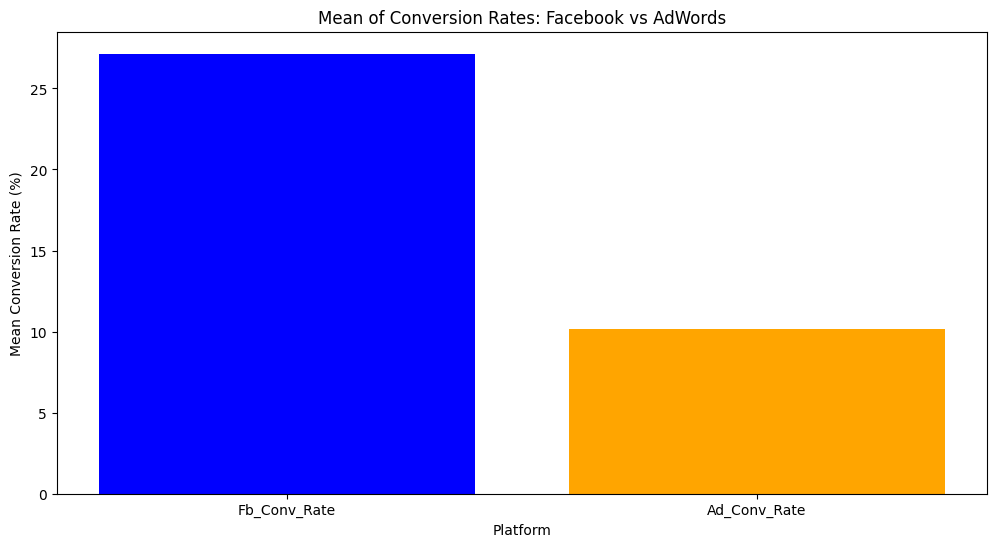

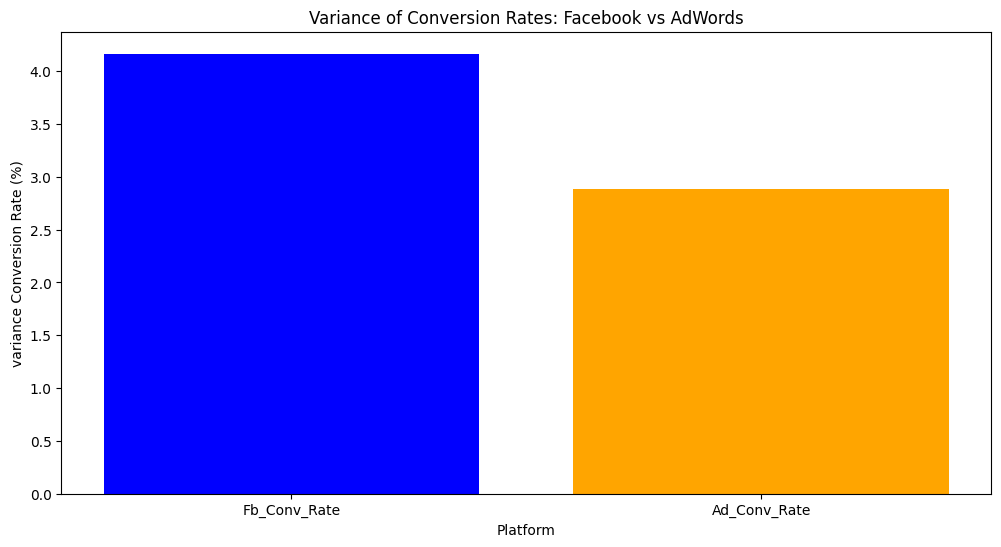

In [ ]:
#Graphs for mean and variance

conversion_rates = ["Fb_Conv_Rate", "Ad_Conv_Rate"]

mc1 = data[conversion_rates]

data_melted = mc1.melt(var_name='Platform', value_name='Conversion Rate')


# Mean Visualization Using Error Bars
means = mc1.mean()
stds = mc1.std()

plt.figure(figsize=(12, 6))
plt.bar(means.index, means.values, capsize=10, color=['blue', 'orange'])
plt.title('Mean of Conversion Rates: Facebook vs AdWords')
plt.xlabel('Platform')
plt.ylabel('Mean Conversion Rate (%)')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(stds.index, stds.values, capsize=10, color=['blue', 'orange'])
plt.title('Variance of Conversion Rates: Facebook vs AdWords')
plt.xlabel('Platform')
plt.ylabel('variance Conversion Rate (%)')
plt.show()

----------------------------------------------------------------------------------------------------------------
Hypothesis for Inference on Population Means using T-test and Z-test:-

Hypothesis: To test whether the means of two populations (Facebook and AdWords conversion rates) are significantly different.

Null Hypothesis (H0): There is no difference in the number of conversions between Facebook and AdWords.

        H0: µ_Fb = µ_Ad

Alternate Hypothesis (H1): There is significant difference in the number of conversions between Facebook and AdWords.

        H1: µ_Fb ≠ µ_Ad

In [ ]:
#Inference on Population Means when standard deviatioins are Known and Unknown
#(Z-test and T-test)

def compare_means(sample1, sample2, known_std1=None, known_std2=None):
    if known_std1 and known_std2:  # Known standard deviations
        pooled_var = (known_std1**2 / len(sample1)) + (known_std2**2 / len(sample2))
        z_score = (np.mean(sample1) - np.mean(sample2)) / np.sqrt(pooled_var)
        p_value = stats.norm.sf(abs(z_score)) * 2  # Two-tailed test
        print(f"Z-Score: {z_score}, P-Value: {p_value}")
    else:  # Unknown standard deviations
        t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)
        print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

    if p_value < 0.05: # Compare with significance level of 0.05
        print("\np-value is less than significance value, Reject the null hypothesis")
    else:
        print("\np-value is greater than significance value, Accept the null hypothesis")


print("Inference Between Two Population Means when stds known:")
compare_means(sample_Fb, sample_Ad, std1, std2)
print()
print()

print("Inference Between Two Population Means when stds unknown:")
compare_means(sample_Fb, sample_Ad)
print()

Inference Between Two Population Means when stds known:
Z-Score: 23.76330119743441, P-Value: 8.006052760871136e-125

p-value is less than significance value, Reject the null hypothesis


Inference Between Two Population Means when stds unknown:
T-Statistic: 23.763301197434405, P-Value: 6.71059243364443e-37

p-value is less than significance value, Reject the null hypothesis



Therefore, the means of two populations (Facebook and AdWords conversion rates) are significantly different.

----------------------------------------------------------------------------------------------------------------
Hypothesis for Inference on Population Variances using F-Test:-

Hypothesis: To test whether the variances of two populations (Facebook and AdWords conversion rates) are significantly different.

Null Hypothesis (H0): The variances of the two populations are equal.

        H0: σ_Fb^2 = σ_Ad^2

Alternate Hypothesis (H1): The variances of the two populations are not equal.

        H1: σ_Fb^2 ≠ σ_Ad^2

In [ ]:
# Inference About Two Population Variances (F-Test)

df1, df2 = n1-1, n2-1

critical_value_upper = f.ppf(0.05, df1, df2)
critical_value_lower = f.ppf(1-0.05, df1, df2)

print("Upper Critical:", critical_value_upper)
print("Lower Critical:", critical_value_lower)
print()

def compare_variances(sample1, sample2):
    f_stat, p_value = stats.levene(sample1, sample2)  # Using Levene's test for equal variances
    print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

    if f_stat > critical_value_upper or f_stat < critical_value_lower: # Compare with critical values
        print("\np-value is less than significance value, Reject the null hypothesis")
    else:
        print("\np-value is greater than significance value, Accept the null hypothesis")

print("\nInference About Two Population Variances:")
compare_variances(sample_Fb, sample_Ad)


Upper Critical: 0.6221654675017778
Lower Critical: 1.6072894627459253


Inference About Two Population Variances:
F-Statistic: 7.384969804070381, P-Value: 0.007777797455741113

p-value is less than significance value, Reject the null hypothesis


Therefore, the variances of two populations (Facebook and AdWords conversion rates) are significantly different.

----------------------------------------------------------------------------------------------------------------
Hypothesis for Inference on Population Variances using Chi-square Test:-

Hypothesis: To test whether the variances of two populations (Facebook and AdWords conversion rates) are equal.

Null Hypothesis (H0): The variances of the two populations are equal.

        H0: σ_Fb^2 = σ_Ad^2

Alternate Hypothesis (H1): The variances of the two populations are not equal.

        H1: σ_Fb^2 ≠ σ_Ad^2

In [ ]:
# Inference About Two Population Variances (Chi-sqaure Test)

# Degrees of freedom
df_fb = n1 - 1
df_aw = n2 - 1

# Perform the Chi-Square Test for Facebook Conversion Rates
chi2_stat_fb = (df_fb * Fb_sample_var) / Ad_sample_var

# Two-tailed test critical values for 95% confidence level
alpha = 0.05
critical_value_lower_fb = chi2.ppf(alpha / 2, df_fb)
critical_value_upper_fb = chi2.ppf(1 - alpha / 2, df_fb)

# Perform the Chi-Square Test for AdWords Conversion Rates
chi2_stat_aw = (df_aw * Ad_sample_var) / Fb_sample_var

# Two-tailed test critical values for 95% confidence level
critical_value_lower_aw = chi2.ppf(alpha / 2, df_aw)
critical_value_upper_aw = chi2.ppf(1 - alpha / 2, df_aw)

# Inference
fb_inference = "Reject H0" if chi2_stat_fb < critical_value_lower_fb or chi2_stat_fb > critical_value_upper_fb \
                            else "Fail to Reject H0"
aw_inference = "Reject H0" if chi2_stat_aw < critical_value_lower_aw or chi2_stat_aw > critical_value_upper_aw \
                            else "Fail to Reject H0"

print()
print(f"Facebook Chi-Square Statistic: {chi2_stat_fb:.4f}, \
        Critical Values: ({critical_value_lower_fb:.4f}, {critical_value_upper_fb:.4f}), \
        Inference: {fb_inference}")
print()
print(f"AdWords Chi-Square Statistic: {chi2_stat_aw:.4f}, \
        Critical Values: ({critical_value_lower_aw:.4f}, {critical_value_upper_aw:.4f}), \
        Inference: {aw_inference}")



Facebook Chi-Square Statistic: 163.7113,         Critical Values: (31.5549, 70.2224),         Inference: Reject H0

AdWords Chi-Square Statistic: 14.6661,         Critical Values: (31.5549, 70.2224),         Inference: Reject H0


Therefore, there is no enough evidence to assume the variances of two populations (Facebook and AdWords conversion rates) are equal.